# PROJECT 2 - INVESTIGATE TMDb DATASET

### Table of Contents
1. Introduction 
2. Data Wrangling 
3. Exploratory Data Analysis 
4. Conclusion 


## Introduction

For this project, I have chosen TMDb movie dataset for Data Analysis. This dataset contains information about several movies. It contains movie details like movie title, director, genre, budget, revenue, popularity, votes and so on. Let's perform Data Analysis on the TMDb dataset and explore more about data provided in the dataset.

We will now start with the first step in the Data Analysis Process, QUESTION! I want to explore more about budget of the movie and see if spending more money in movie making makes the movie more successful as in yield profit than otherwise. Also, to see if high budget movies are more popular and recieve more public votes. For this dataset, I want to choose movie 'budget' as my dependent variable and explore it with other independent variables.

Here are my questions,  <br/>QUESTION 1 - Do high budget movies have more chances of being successful?  <br/>QUESTION 2 - Are high budget movies more popular?    

Let's start the Data Analysis process first by importing all the packages we will need for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Data Wrangling

In this step of the process the datset is prepared for analysis. It first starts with opening the dataset into Jupyter notebook, then assess or inspect the dataset to identify problems in quality or stucture of dataset and then finally clean it by modifying, replacing or moving data to ensure that we have a well structured dataset for further analysis.

Here, we are uploading the TMDb movie dataset "tmdb-movies-main.csv" into Jupyter notebook and saving it as 'df'. Let's go ahead and open df and look at different columns, count, various descriptive statistics of the dataset. 

In [2]:
df = pd.read_csv('tmdb-movies-main.csv')

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## General Properties

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's drop all the columns that will not be used for analysis before we check for missing values or null values and cleaning the data. 

In [7]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

## Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 679.2+ KB


From the above info table, we see that there are 8 columns with 10866 rows of data except 'genre' which has few missing values. Let's take a look at those rows with missing data and delete them because it's a factual text and I could not approximate it from other values within 'genre'.

In [9]:
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
424,0.244648,0,0,Belli di papÃ,100,NaN,6.1,2015
620,0.129696,0,0,All Hallows' Eve 2,90,NaN,5.0,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,6.8,2014
1712,0.302095,0,0,Prayers for Bobby,88,NaN,7.4,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,7.0,2009
2370,0.081892,0,0,Freshman Father,0,NaN,5.8,2010
2376,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,7.7,2010
2853,0.130018,0,0,Vizontele,110,NaN,7.2,2001
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,6.1,2008
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,8.3,2012


From the above table, I see a lot of zero's in 'budget' and 'revenue' column, let's invetigate it further. 
Rows with missing 'genre' values are first deleted before invetigating zero values in 'budget'.

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
vote_average      10843 non-null float64
release_year      10843 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 762.4+ KB


In [12]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,5.973974,2001.315595
std,1.000986,3.093864e+07,1.171131e+08,31.293320,0.934260,12.813298
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


There are more zero values than what I expected to see. Values at 25% and 50% are 0 so there are atleast about 50% of 'budget' and 'revenue' columns have 0 value. It might be possible that data for these rows were missing and zero is entered instead of NAN, but here we'll keep our focus on analysing 'budget' value with other variables which requires a non-zero value.

Lets's explore further to see how many rows having zero 'budget' value.

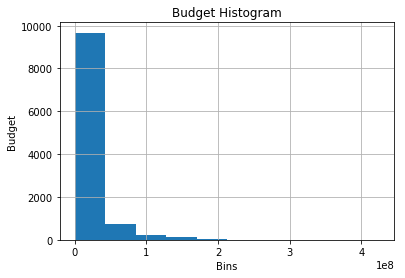

In [49]:
df['budget'].hist()
plt.title('Budget Histogram')
plt.xlabel('Bins')
plt.ylabel('Budget');

In [14]:
df.groupby(df['budget'] == 0).count()

,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
budget,,,,,,,,
False,5169,5169,5169,5169,5169,5169,5169,5169
True,5674,5674,5674,5674,5674,5674,5674,5674


5674 rows have 0 value which is more than 50% of the dataset.

Moving further all the rows with zero 'budget' value will not be used for analysis as 'budget' is my dependent variable and I dont want to use an approximate fit value for 50% of the dataset. Data for rows with 'budget' value > 0 will be assigned to 'df_bud' and this data will be used for further analysis. 

The histogram of budget after grouping still looks the same as the earlier histogram with zero values. The count of budget looks the same in both plots. This is because inspite of reduced count after data being grouped their index num is the same as before. Therefore their index needs to be reset. 

In [15]:
df_bud = df[df['budget'] > 0]

In [16]:
df_bud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 10865
Data columns (total 8 columns):
popularity        5169 non-null float64
budget            5169 non-null int64
revenue           5169 non-null int64
original_title    5169 non-null object
runtime           5169 non-null int64
genres            5169 non-null object
vote_average      5169 non-null float64
release_year      5169 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 363.4+ KB


In [17]:
df_bud.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,5169.000000,5.169000e+03,5.169000e+03,5169.000000,5169.000000,5169.000000
mean,0.992449,3.074538e+07,8.029119e+07,107.100213,6.032695,2001.258851
std,1.329243,3.890207e+07,1.594864e+08,22.805477,0.883235,11.769043
min,0.001117,1.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.348223,6.000000e+06,0.000000e+00,93.000000,5.500000,1996.000000
50%,0.624024,1.700000e+07,2.100156e+07,103.000000,6.100000,2005.000000
75%,1.152417,4.000000e+07,8.945676e+07,117.000000,6.600000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,540.000000,8.400000,2015.000000


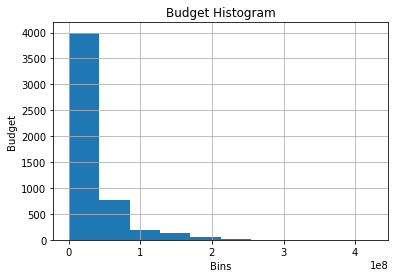

In [22]:
df_bud['budget'].hist()
plt.title('Budget Histogram')
plt.xlabel('Bins')
plt.ylabel('Budget');

In [ ]:
df_bud.reset_index(drop = True, inplace = True)
df_bud.drop(['genres', 'runtime'], axis = 1, inplace = True)

Now that our data is trimmed and cleaned, we're ready to move onto next step which is Exploratory Analysis.

## Exploratory Analysis

This step in the Analysis process is about exploring and augmenting data to maximize the potential of the analysis or visualization.

Let's look at our first question and explore the possibilities.

### QUESTION 1 - Do high budget movies have more chances of being successful?

Let's plot a scatter plot and see what kind of correlation is between 'budget' and 'revenue'?

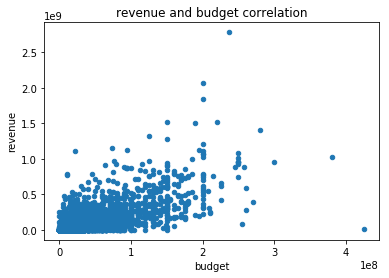

In [47]:
df_bud.plot.scatter('budget', 'revenue')
plt.title('revenue and budget correlation');

There is a positive correlation between 'budget' and 'revenue'. Let's investigate further.

Here, success is if the movie made profit or loss. Profit or loss is obtained when revenue is subtracted from budget, if the result after subtraction is positive then movie made Profit and if the result is negative then the movie didn't make up for what was spent on it which is Loss. 
A new column name 'bud_success' is created with text value 'P' for profit and 'L' for loss. 

In [26]:
df_bud['bud_success'] = df_bud.revenue - df_bud.budget
df_bud.loc[:, 'bud_success'] = df_bud.bud_success.apply( lambda x: 'P' if x > 0 else 'L')

In [27]:
df_bud.head(1)

,popularity,budget,revenue,original_title,vote_average,release_year,bud_success
0,32.985763,150000000,1513528810,Jurassic World,6.5,2015,P


Now that we have 'bud_success' inplace, let's analyse 'budget' with 'bud_success'

In [28]:
df_bud.groupby('bud_success')['budget'].mean()

bud_success
L    1.967315e+07
P    4.027515e+07
Name: budget, dtype: float64

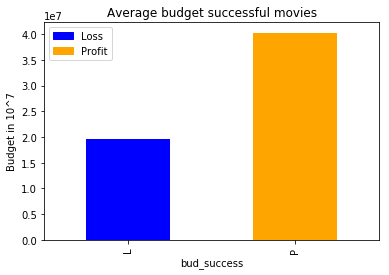

In [34]:
df_bud.groupby('bud_success')['budget'].mean().plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Average budget successful movies')
plt.ylabel('Budget in 10^7')
orange_patch = mpatches.Patch(color='orange', label='Profit')
blue_patch = mpatches.Patch(color='blue', label='Loss')
plt.legend(handles=[blue_patch, orange_patch]);

It is evident that there are more movies that generated profits than loss. But it's not clear if the budget is high, low or anywhere in between. We need to go deep and analyse for different budget ranges, as budget is spread over a wide range from $1 to 4.28 x 10^8.

We can use the cut function to bin budget into different groups. Let's create a new column 'budget_type' with one of the value from these groups 'low', 'medium', 'high', 'very high'. 

In [30]:
group_names = ['low', 'medium', 'high', 'very high']

In [31]:
df_bud.loc[:, 'budget_type'] = pd.cut(df_bud['budget'], 4, labels = group_names, right = True, include_lowest = True)

In [32]:
df_bud.head(1)

,popularity,budget,revenue,original_title,vote_average,release_year,bud_success,budget_type
0,32.985763,150000000,1513528810,Jurassic World,6.5,2015,P,medium


In [33]:
df_bud.groupby('budget_type')['bud_success'].value_counts()

budget_type  bud_success
low          P              2536
             L              2366
medium       P               221
             L                23
high         P                20
             L                 1
very high    L                 1
             P                 1
Name: bud_success, dtype: int64

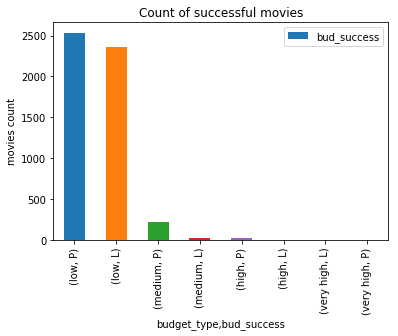

In [36]:
df_bud.groupby('budget_type')['bud_success'].value_counts().plot(kind = 'bar')
plt.title('Count of successful movies')
plt.ylabel('movies count');

We can see that low budget movies have more chances of Loss than other budget range. Movies have more chances of being successful as the 'budget' increases.
There are a total of 23 high and very high budget movies out of which 21 have generated profit.

Let's mask the 'bud_success' with 'profit' and 'loss' for further analysis to get better visualization.

In [38]:
profit = df_bud.bud_success == 'P'
loss = df_bud.bud_success == 'L'

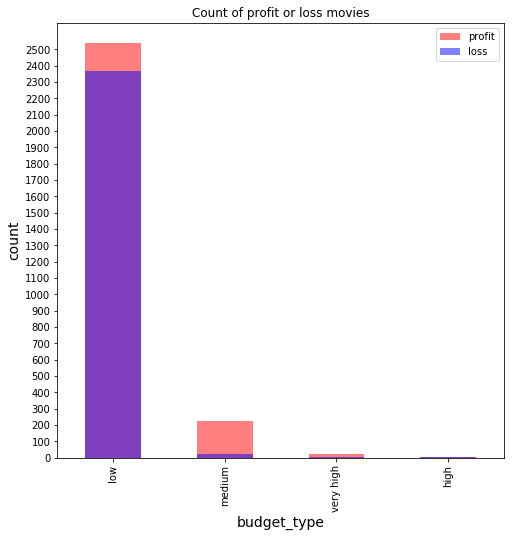

In [39]:
df_bud.budget_type[profit].value_counts().plot(kind = 'bar', color = 'red', alpha = 0.5, label = 'profit', figsize = (8, 8), yticks = range(0,2600,100))
df_bud.budget_type[loss].value_counts().plot(kind = 'bar', color = 'blue', alpha = 0.5, label = 'loss', figsize = (8, 8), yticks = range(0,2600,100))
plt.title('Count of profit or loss movies')
plt.xlabel('budget_type', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.legend();

It is evident that more movies generated profits than loss, specially in the'high' category 20 out of 21 movies are successful. We don't have enough data to go deep into 'very high' budget movie, there are 2 data points out of which one acheived profit and the other loss. 

So instead of dropping out 'very high budget' movies from our analysis let's combine it together with 'high' budget and still it will have a positive correlation between high or very high budget movies and revenue as 21 out 23 movies are successful. 

### QUESTION 2 - Are high budget movies more popular?

Now, let's see how 'budget' is associated with 'popularity'. Below is the scatter plot to see what kind of correlation is between 'budget' and 'popularity'. It looks like they share a positive correlation, as budget increases so does popularity.

Lets see how high or very high biudget is associated with popularity .

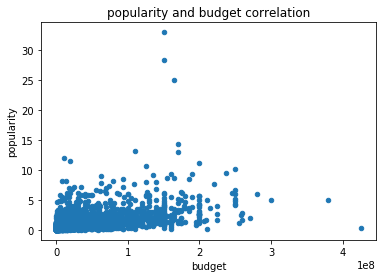

In [48]:
df_bud.plot.scatter('budget', 'popularity')
plt.title('popularity and budget correlation');

In [34]:
df_bud.groupby(['budget_type'])['popularity'].mean()

budget_type
low          0.863212
medium       3.261502
high         4.642358
very high    2.602835
Name: popularity, dtype: float64

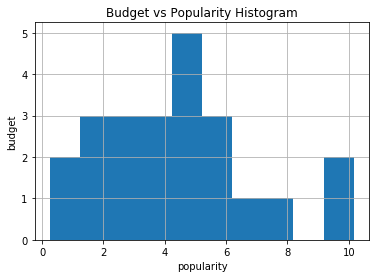

In [41]:
df_bud.query("budget_type == 'high' or budget_type == 'very high'")['popularity'].hist()
plt.title('Budget vs Popularity Histogram')
plt.xlabel('popularity')
plt.ylabel('budget');

In [36]:
df_bud.query("budget_type == 'high' or budget_type == 'very high'")['popularity'].mean()

4.465007869565216

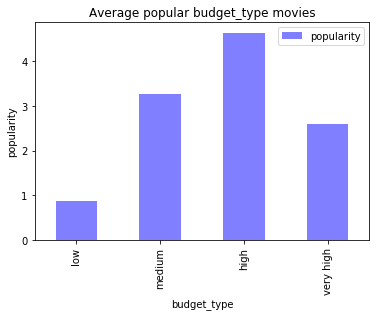

In [42]:
df_bud.groupby(['budget_type'])['popularity'].mean().plot(kind = 'bar', color = 'blue', alpha = 0.5)
plt.title('Average popular budget_type movies')
plt.ylabel('popularity')
plt.legend();

Popularity is more for budget greater than 'high' budget movies than the rest. Let's explore the association of 'budget_type' with 'vote_average'.

Vote average is high for 'high' budget movies as compared to the rest.

In [38]:
df_bud.groupby(['budget_type'])['vote_average'].mean()

budget_type
low          6.015626
medium       6.311475
high         6.747619
very high    6.350000
Name: vote_average, dtype: float64

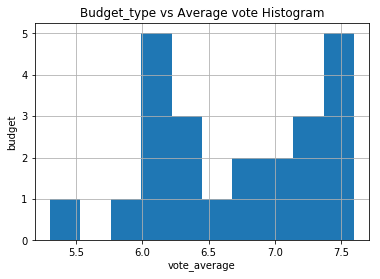

In [43]:
df_bud.query("budget_type == 'high' or budget_type == 'very high'")['vote_average'].hist()
plt.title('Budget_type vs Average vote Histogram')
plt.xlabel('vote_average')
plt.ylabel('budget');

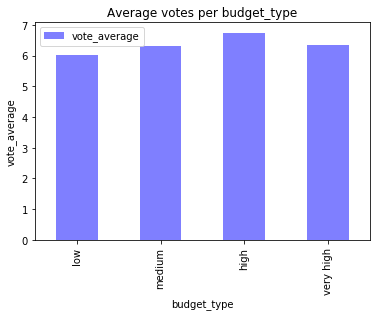

In [44]:
df_bud.groupby(['budget_type'])['vote_average'].mean().plot(kind = 'bar', color = 'blue', alpha = 0.5)
plt.title('Average votes per budget_type')
plt.ylabel('vote_average')
plt.legend();

In [40]:
df_bud.query("budget_type == 'high' or budget_type == 'very high'")['vote_average'].mean()

6.713043478260871

Graph below shows that both popularity and vote_average  are high for 'high' budget movies.

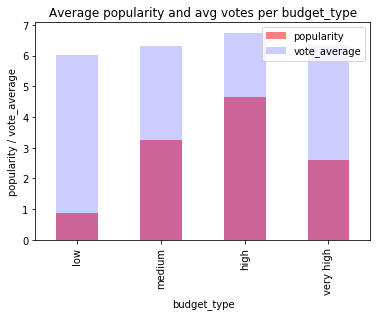

In [45]:
df_bud.groupby(['budget_type'])['popularity'].mean().plot(kind = 'bar', color = 'red', alpha = 0.5)
df_bud.groupby(['budget_type'])['vote_average'].mean().plot(kind = 'bar', color = 'blue', alpha = 0.2)
plt.title('Average popularity and avg votes per budget_type')
plt.ylabel('popularity / vote_average')
plt.legend();

## Conclusions
 
For this analysis inferential statistics or machine learning were not used to complete the project, hence our findings are tentative.

Our dependent variable is 'budget' and independent variables are 'revenue', 'popularity', 'vote_average'. I have retained 'original title' and 'year' for reference sake.

The TMDb dataset had 10866 rows and 21 columns to start with and it was bought down to 5169 rows and 8 columns. The size of the dataset is reduced by about 50% and this is a limitation to the project. 
    The reason for not using about half of the original dataset is because that part of the dataset had zero value for budget. The reason for zero value is unknown, and filling in an approximate mean or median value for half of the dataset wouldn't result in good findings or results. Hence, I decided to use the part of the dataset with 'budget' value greater than zero.
    'genres' also, had NAN values but the 'budget' values were zero for all those rows and hence they were deleted too.
        
Below is a summary of findings and results obtained from the analysis. Let's go over each question and summarize the result.

QUESTION 1 - Do high budget movies have more chances of being successful?
        The result from our analysis is, "YES" high and very high budget movies have more chances of being successful than low budget movies. It is seen that 21 out of 23 movies generated profit. The following steps were followed to achieve results.
        A new column 'success' is created with 'P' or 'L' values. Success is definied as 'Profit' or 'Loss' here, and it is obtained by subtracting 'revenue' from 'budget'. If the result after subtraction is positive then its profit 'P' else if the result is negative then it is 'Loss', 'L'.
        For our analysis, we performed various exploratory analysis to see assossiation between 'budget' and 'success'. While doing so, budget has a wider range and the visualization was not clear if the budget is high or low or anywhere in between. Therefore, to get a better visualization another new column 'budget_type' is created where budget is binned into four groups 'low', 'medium', 'high' and 'very high' using 'cut' function.
       

QUESTION 2 - Are high budget movies more popular?
        The result from our analysis is, "YES" high and very high budget movies have more more popularity ratings than low budget movies. To go deeper, association between 'budget_type' and 'vote_average' was also explored and it showed that high and above budget movies recieved higher vote averages than low budget movies. 
        
        